In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import natsort
import GrowthAssayPlotlib

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
USE_MULTIINVASION = False

if USE_MULTIINVASION:
    ga2_file = 'GA2 parasitemia multiinvasion.xlsx'
    column_title_row = 0
    OUTPUT_FOLDER = 'Graph Multiinvasion'

else:
    ga2_file = 'GA2 parasitemia.xlsx'
    column_title_row = 3
    OUTPUT_FOLDER = ''

df2 = GrowthAssayPlotlib.load_file(ga2_file, column_title_row)
df2_melted_replicas = GrowthAssayPlotlib.melt_df(df2, id_vars=['Plate number', 'Well position', 'Line', 'Clone', 'Strain', 'Speed'])

hematocrit_levels = ['2%', '4%', '8%']

# Extract hematocrit level and create 'Line simple' column

df2_melted_replicas['Hematocrit'] = df2_melted_replicas['Line'].str.extract(f'({"|".join(hematocrit_levels)})', expand=False)
df2_melted_replicas['Hematocrit'] = df2_melted_replicas['Hematocrit'].fillna('4%')

group_keys = ['Line', 'Speed', 'Hematocrit']

df2_melted_replicas.head()
df2_melted_replicas['Line'].unique()
df2_melted_replicas['Hematocrit'].unique()


Loading GA2 parasitemia.xlsx
['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12']
Repeat 1 = Day 2 / Day 1, Parasitemia 1 = Day 1
Repeat 2 = Day 4 / Day 3, Parasitemia 2 = Day 3
Repeat 3 = Day 6 / Day 5, Parasitemia 3 = Day 5
Repeat 4 = Day 8 / Day 7, Parasitemia 4 = Day 7
Repeat 5 = Day 10 / Day 9, Parasitemia 5 = Day 9
Repeat 6 = Day 12 / Day 11, Parasitemia 6 = Day 11


array(['2%', '8%', '4%'], dtype=object)

In [4]:
# plot all 
MAX_INVASION_RATE_PLOT = 25
output_folder_ga2 = GrowthAssayPlotlib.get_output_folder('GA2', OUTPUT_FOLDER)

df2_melted_replicas_filtered = GrowthAssayPlotlib.filter_dataframe(
    df=df2_melted_replicas,
    ignore_repeats=[
        'Repeat 1',
    ],
    filter_list_filename='GA2 filtered.csv'
)

# group replicas per repeat
df2_melted_grouped = GrowthAssayPlotlib.group_repeats(
    df_melted_replicas_filtered = df2_melted_replicas_filtered,
    group_keys=['Line', 'Speed', 'Repeat', 'Strain', 'Clone', 'Hematocrit'],
)

df2_melted = df2_melted_replicas_filtered

df2_melted.to_json('GA2_df_melted.json')

# GrowthAssayPlotlib.plot_repeats_for_line(df2_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga2)
# GrowthAssayPlotlib.plot_repeats_for_wells(df2_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga2)
# GrowthAssayPlotlib.plot_parasimetia_vs_invasion_rate(df2_melted_replicas, ['Line', 'Speed'], output_folder=output_folder_ga2)
# for label, df_plot in [('with replicas', df2_melted_replicas), ('averaged replicas', df2_melted)]:
#     GrowthAssayPlotlib.plot_line(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga2)
#     GrowthAssayPlotlib.plot_speed(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga2)

(4, "H1"),
(6, "G9"),
(6, "H6"),
(8, "A1"),
(8, "A2"),
(8, "A5"),
(8, "E11"),
(8, "G8"),
(8, "H6"),
(10, "A2"),
(10, "B10"),
(10, "G1"),
(10, "H8"),
(12, "A2"),
(12, "A4"),
(12, "A6"),
(12, "A7"),
(12, "A8"),
(12, "B2"),
(12, "B3"),
(12, "B10"),
(12, "C7"),
(12, "C9"),
(12, "F2"),
(12, "F4"),
(12, "F6"),
(12, "G2"),
(12, "G11"),
(12, "H1"),
(12, "H8"),
(12, "H12"),


In [5]:
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=df2_melted,
#     plot_clones=False, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga2,
# )
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=df2_melted,
#     plot_clones=True, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga2,
# )

# clone_list = [
#     'KOEBA181 C1',
#     'KORH4 C1',
#     'KOEBA140 C4', 
#     'KOEBA175 C6',
#     'KORH2a C3',
#     'KORh1 C2',
#     'KOPfs25 C1',
#     'KOP230P C3',
# ]
# dfq = df2_melted.query('Line == @clone_list')
# GrowthAssayPlotlib.plot_pretty_barplot(
#     df=dfq,
#     plot_clones=True, # or 'Line' if you want clones to show separatley
#     output_folder=output_folder_ga2,
# )


In [6]:
GrowthAssayPlotlib.significance_testing(
    df=df2_melted_grouped, 
    group_keys=['Strain', 'Speed', 'Hematocrit'],
    line_key='Strain',
    wildtype='NF54',
)


Testing Strain for 180-rpm, 2%.
   - NF54 and 3D7         : ttest p-value = 0.0722, not
Testing Strain for 180-rpm, 4%.
   - NF54 and 3D7         : ttest p-value = 0.2187, not
   - NF54 and KOEBA175    : ttest p-value = 0.6557, not
Testing Strain for 180-rpm, 8%.
   - NF54 and 3D7         : ttest p-value = 0.9704, not
Testing Strain for 45-rpm, 2%.
   - NF54 and 3D7         : ttest p-value = 0.0001, significant
Testing Strain for 45-rpm, 4%.
   - NF54 and 3D7         : ttest p-value = 0.0024, significant
   - NF54 and KOEBA175    : ttest p-value = 0.0001, significant
Testing Strain for 45-rpm, 8%.
   - NF54 and 3D7         : ttest p-value = 0.3477, not
Testing Strain for 90-rpm, 2%.
   - NF54 and 3D7         : ttest p-value = 0.1747, not
Testing Strain for 90-rpm, 4%.
   - NF54 and 3D7         : ttest p-value = 0.0015, significant
   - NF54 and KOEBA175    : ttest p-value = 0.7346, not
Testing Strain for 90-rpm, 8%.
   - NF54 and 3D7         : ttest p-value = 0.0001, significant
Testi

3D7
KOEBA175
NF54


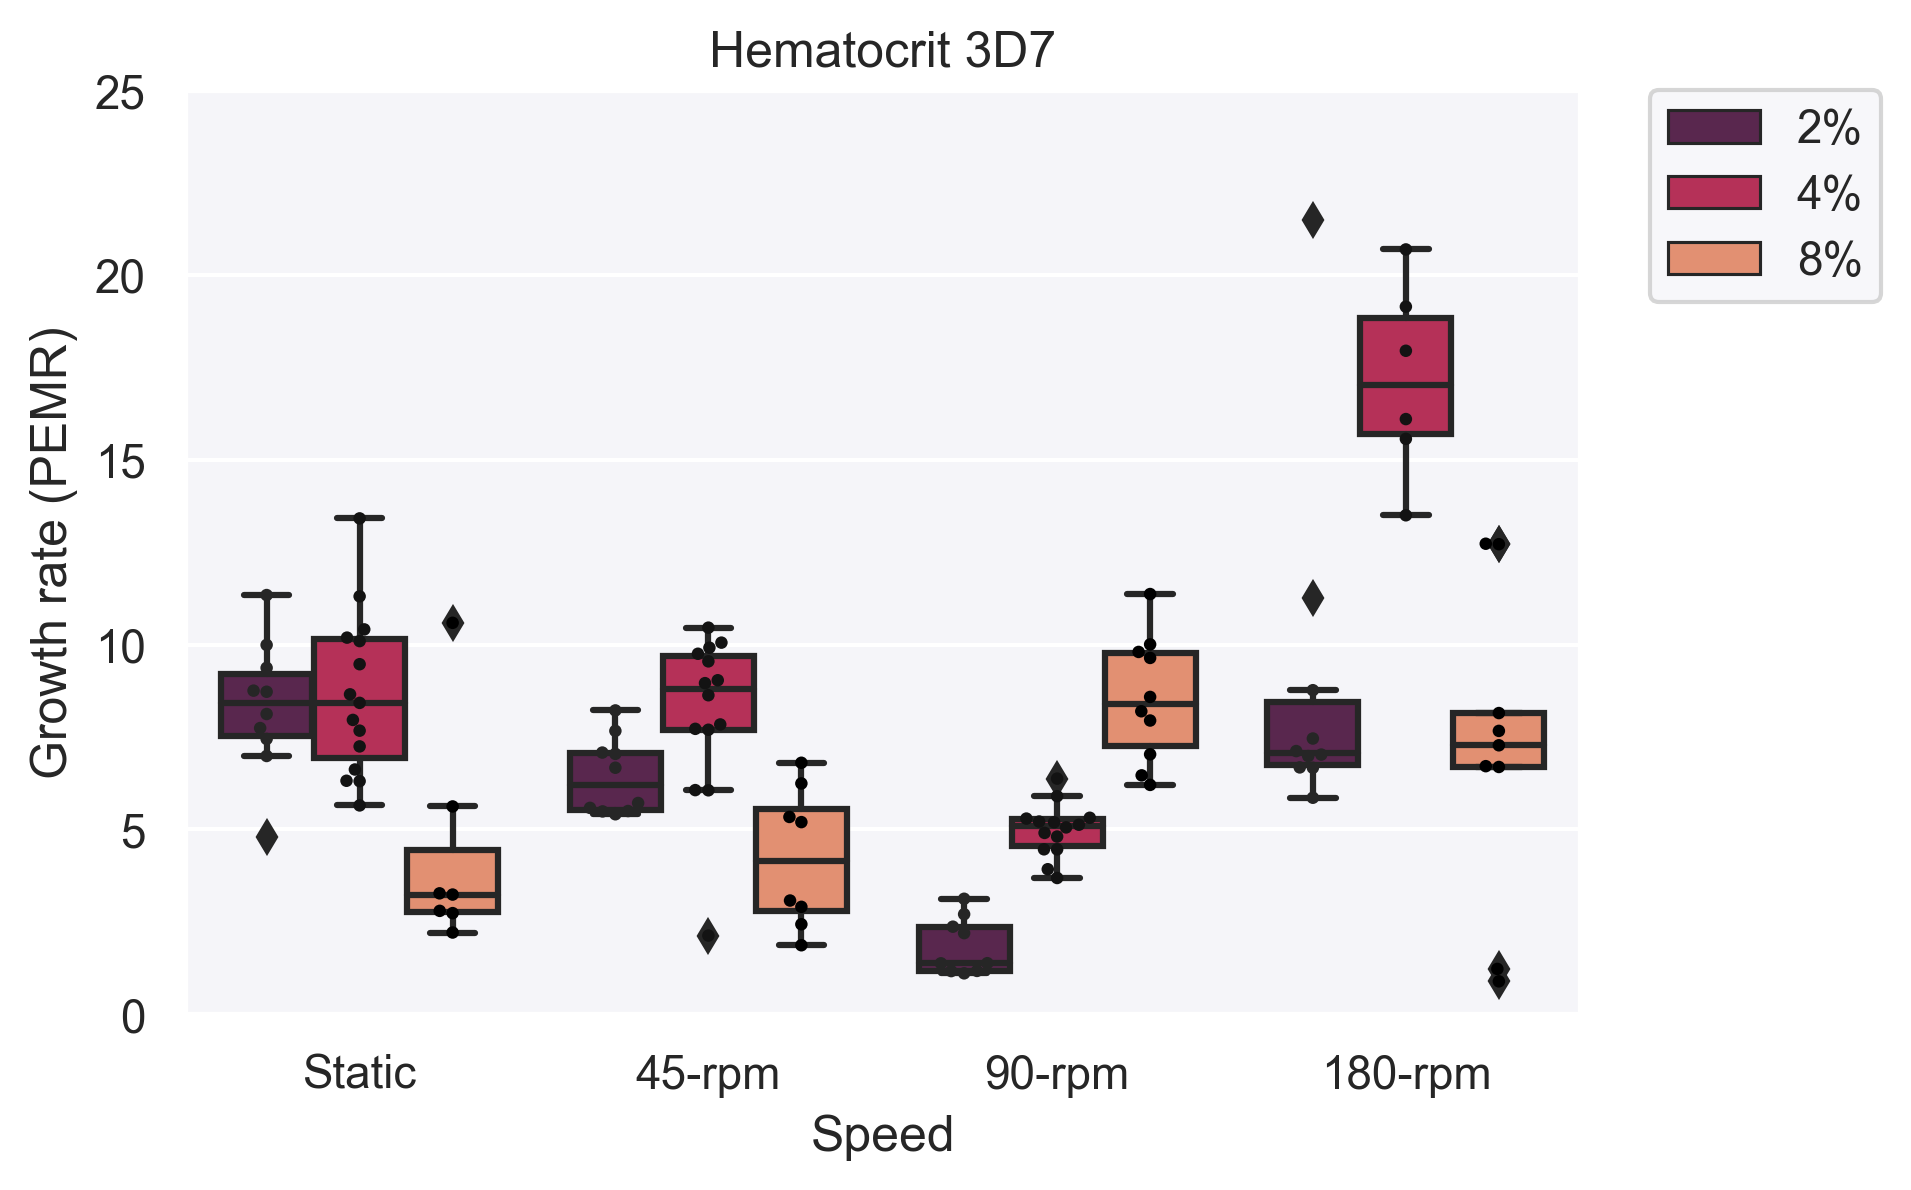

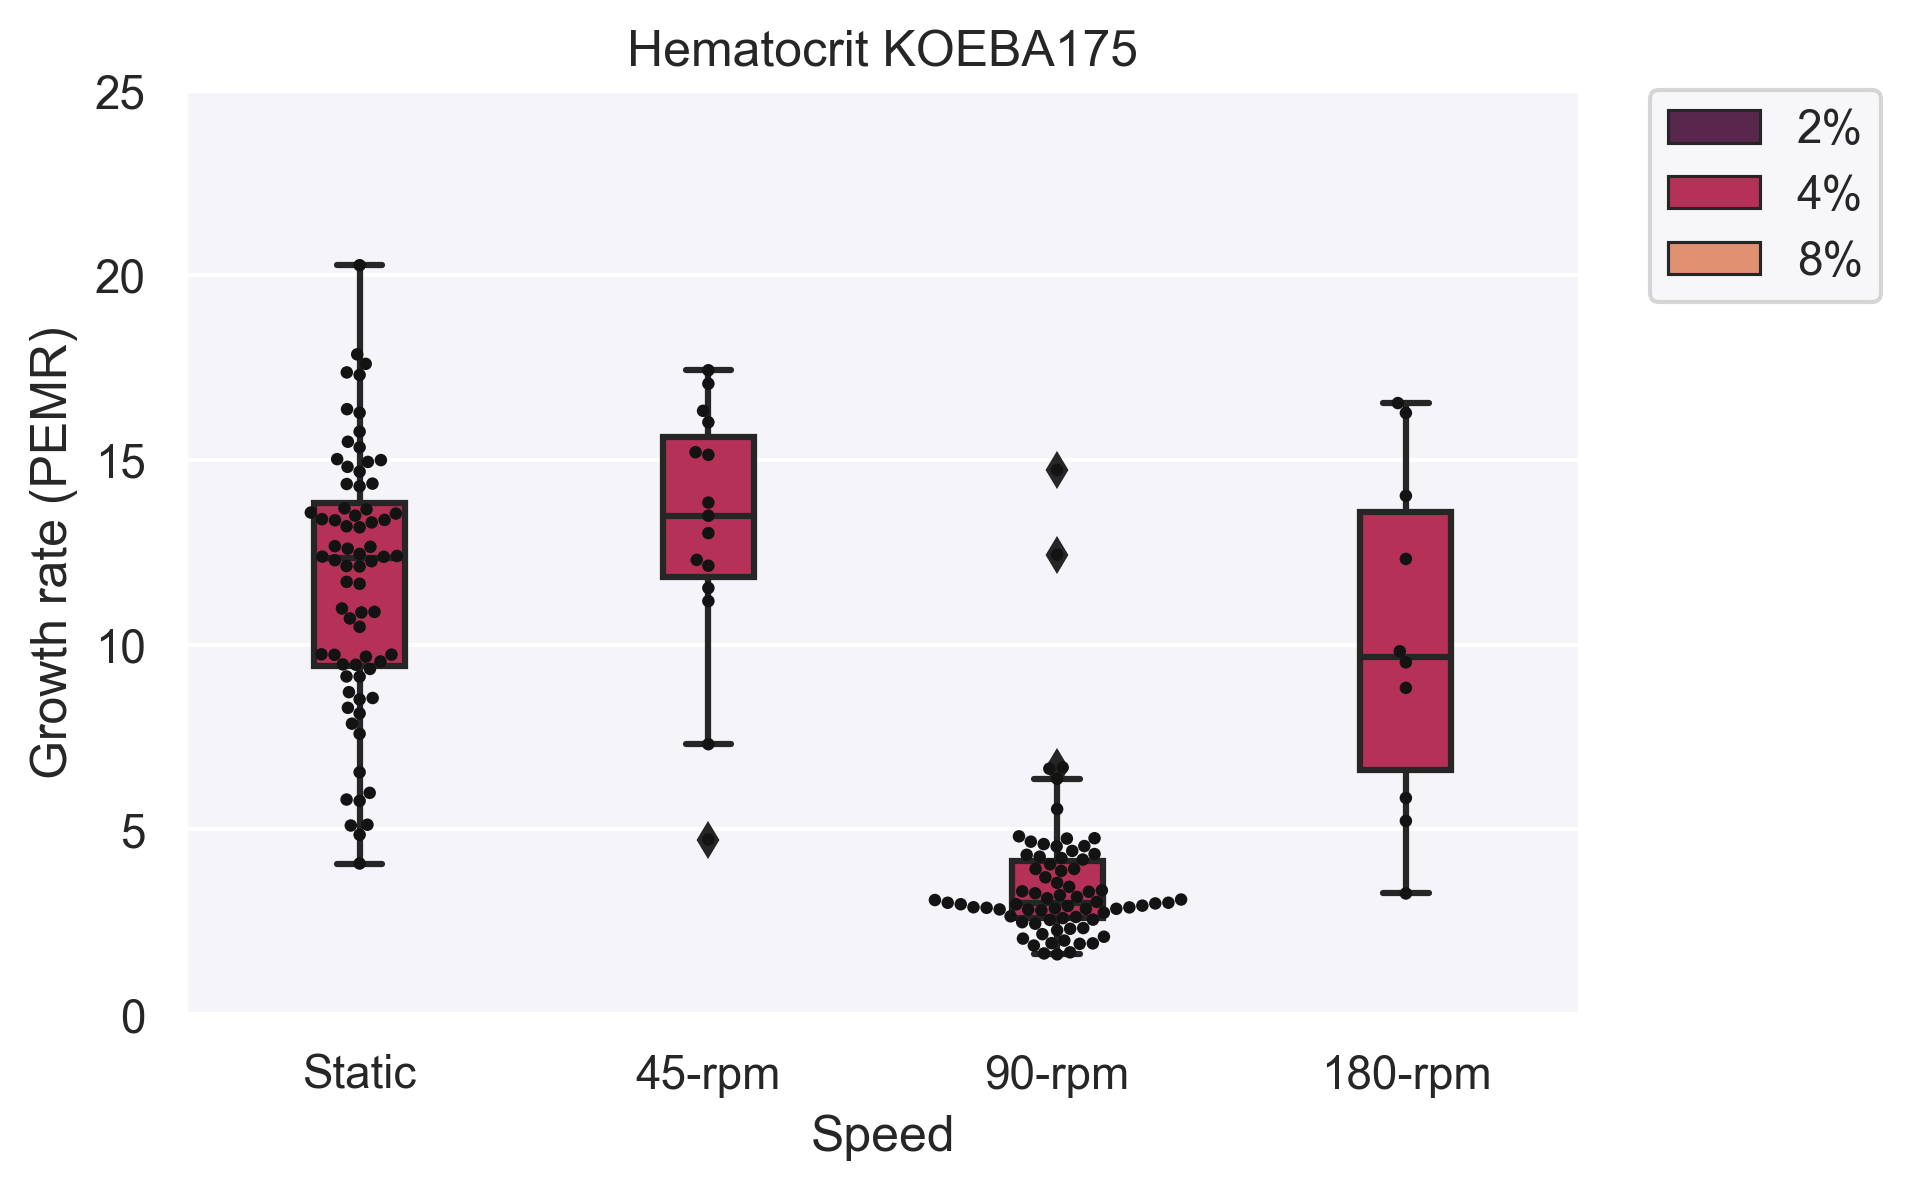

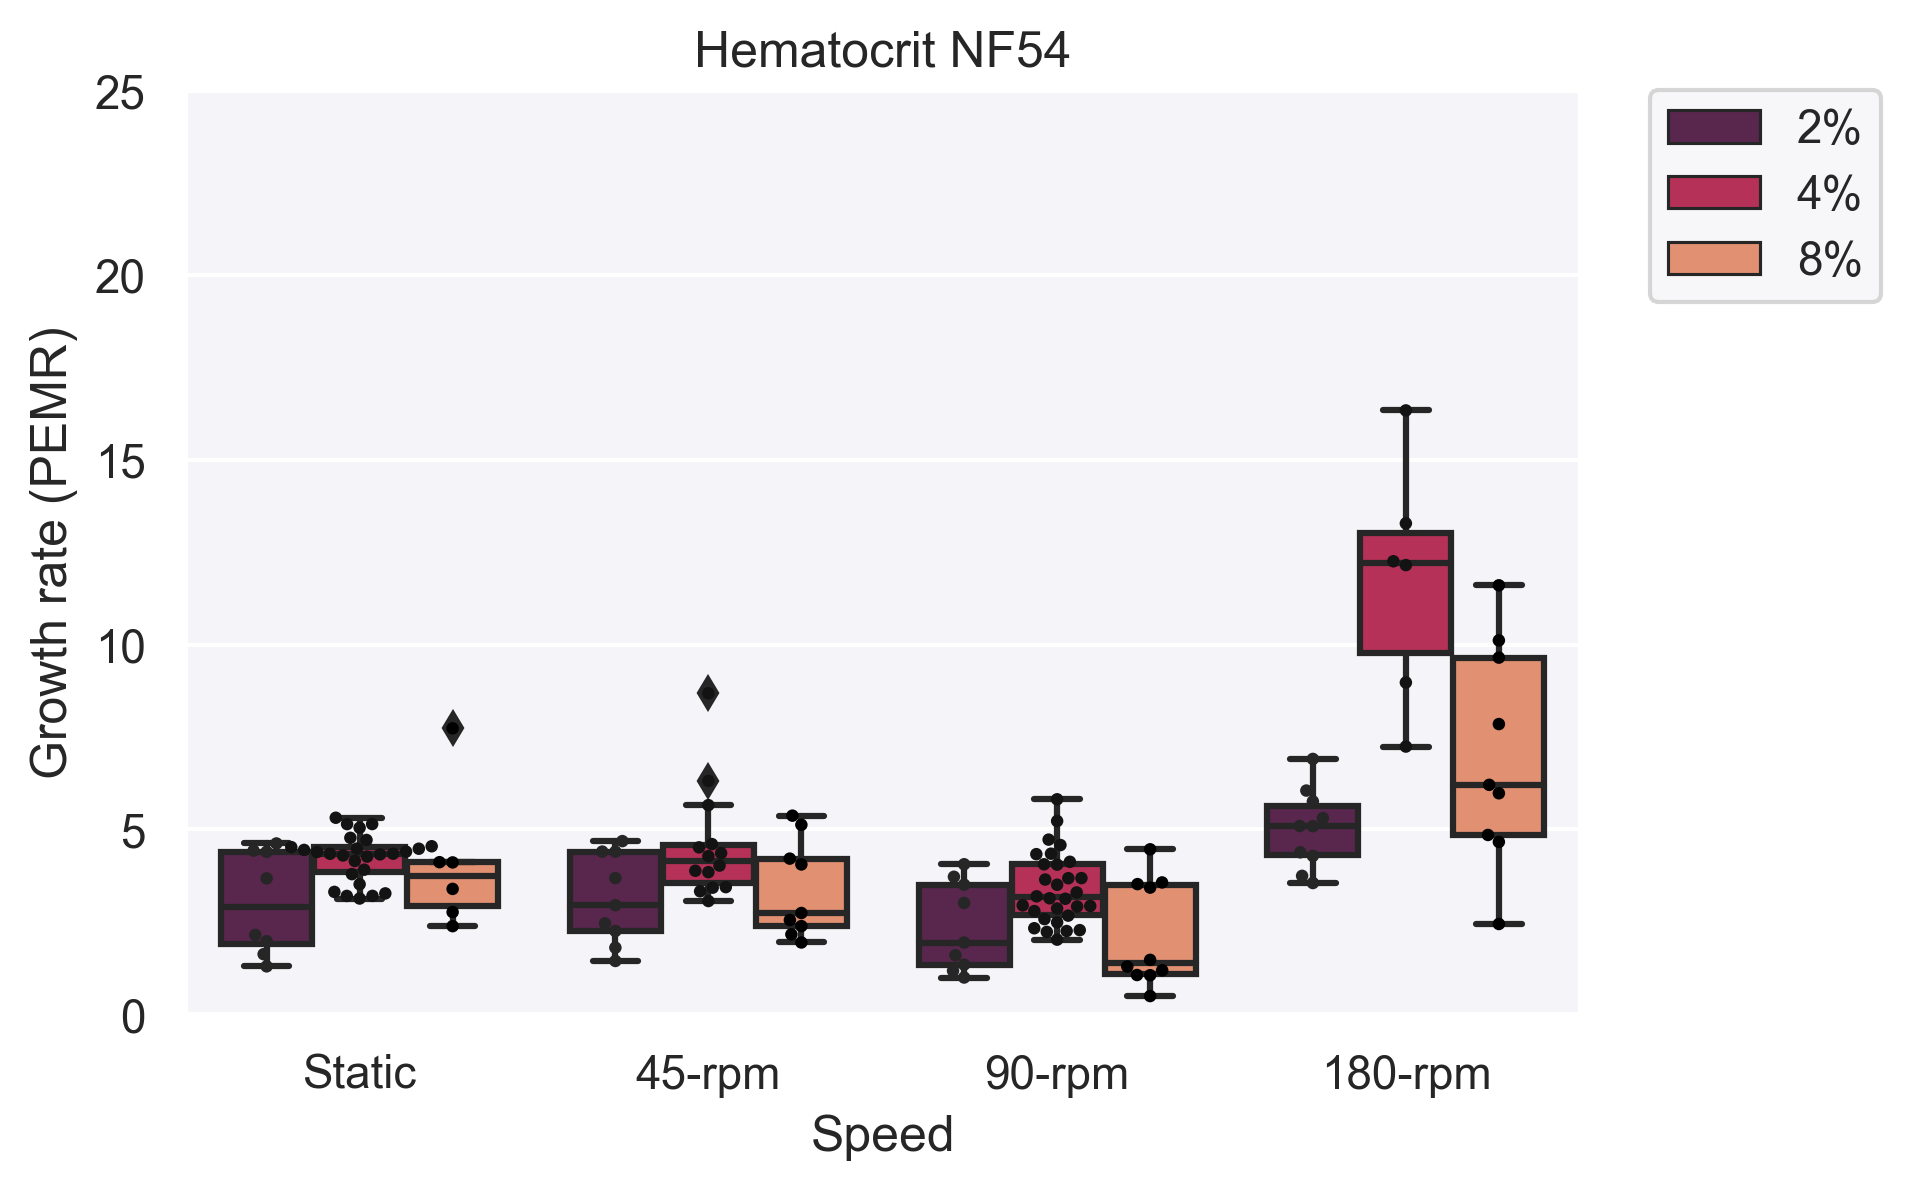

In [11]:
%matplotlib inline

sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=1) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

# Plot 3D7 / NF54  different hematocrit
df_hem = df2_melted.copy()
hue_order = ['2%', '4%', '8%']
for line, dfg in df_hem.dropna().groupby('Strain'):
    print(line)
    plt.figure(figsize=(6,4), dpi=300)
    sns.boxplot(x='Speed', order=GrowthAssayPlotlib.speed_order, y='Invasion rate', data=dfg, hue='Hematocrit', hue_order=hue_order, palette='rocket')
    sns.swarmplot(x='Speed', order=GrowthAssayPlotlib.speed_order, y='Invasion rate', data=dfg, hue='Hematocrit', hue_order=hue_order, color='black', dodge=True, size=3, legend=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(f'Hematocrit {line}')
    plt.ylabel(GrowthAssayPlotlib.YLABEL)
    plt.ylim((0,MAX_INVASION_RATE_PLOT))
    plt.ylim((0,25))
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(os.path.join(output_folder_ga2, f'FIG Hematocrit {line}.svg'), bbox_inches='tight')
    # plt.close()

['NF54' '3D7' 'NF54 C2' 'KOEBA175 mix' 'KOEBA175 C1' 'KOEBA175 C2'
 'KOEBA175 C6' 'KOEBA175 3D7']
180-rpm, 3D7 2%, 8.93, 1.47
180-rpm, 3D7 4%, 17.16, 1.07
180-rpm, 3D7 8%, 7.12, 1.38
180-rpm, KOEBA175 C6, 10.17, 1.45
180-rpm, NF54 2%, 5.02, 0.33
180-rpm, NF54 4%, 11.71, 1.31
180-rpm, NF54 8%, 7.04, 0.99
45-rpm, 3D7 2%, 6.44, 0.33
45-rpm, 3D7 4%, 8.13, 0.59
45-rpm, 3D7 8%, 4.23, 0.66
45-rpm, KOEBA175 C6, 13.11, 0.91
45-rpm, NF54 2%, 3.12, 0.41
45-rpm, NF54 4%, 4.53, 0.40
45-rpm, NF54 8%, 3.39, 0.44
90-rpm, 3D7 2%, 1.84, 0.25
90-rpm, 3D7 4%, 4.98, 0.19
90-rpm, 3D7 8%, 8.53, 0.53
90-rpm, KOEBA175 3D7, 2.55, 0.17
90-rpm, KOEBA175 C1, 4.17, 0.68
90-rpm, KOEBA175 C2, 3.67, 0.23
90-rpm, KOEBA175 C6, 2.85, 0.15
90-rpm, KOEBA175 mix, 4.64, 0.80
90-rpm, NF54 2%, 2.37, 0.40
90-rpm, NF54 4%, 2.97, 0.23
90-rpm, NF54 8%, 2.15, 0.45
90-rpm, NF54 C2, 3.82, 0.22
Static, 3D7 2%, 8.33, 0.56
Static, 3D7 4%, 8.65, 0.56
Static, 3D7 8%, 4.35, 1.12
Static, KOEBA175 3D7, 6.80, 0.72
Static, KOEBA175 C1, 13.64, 

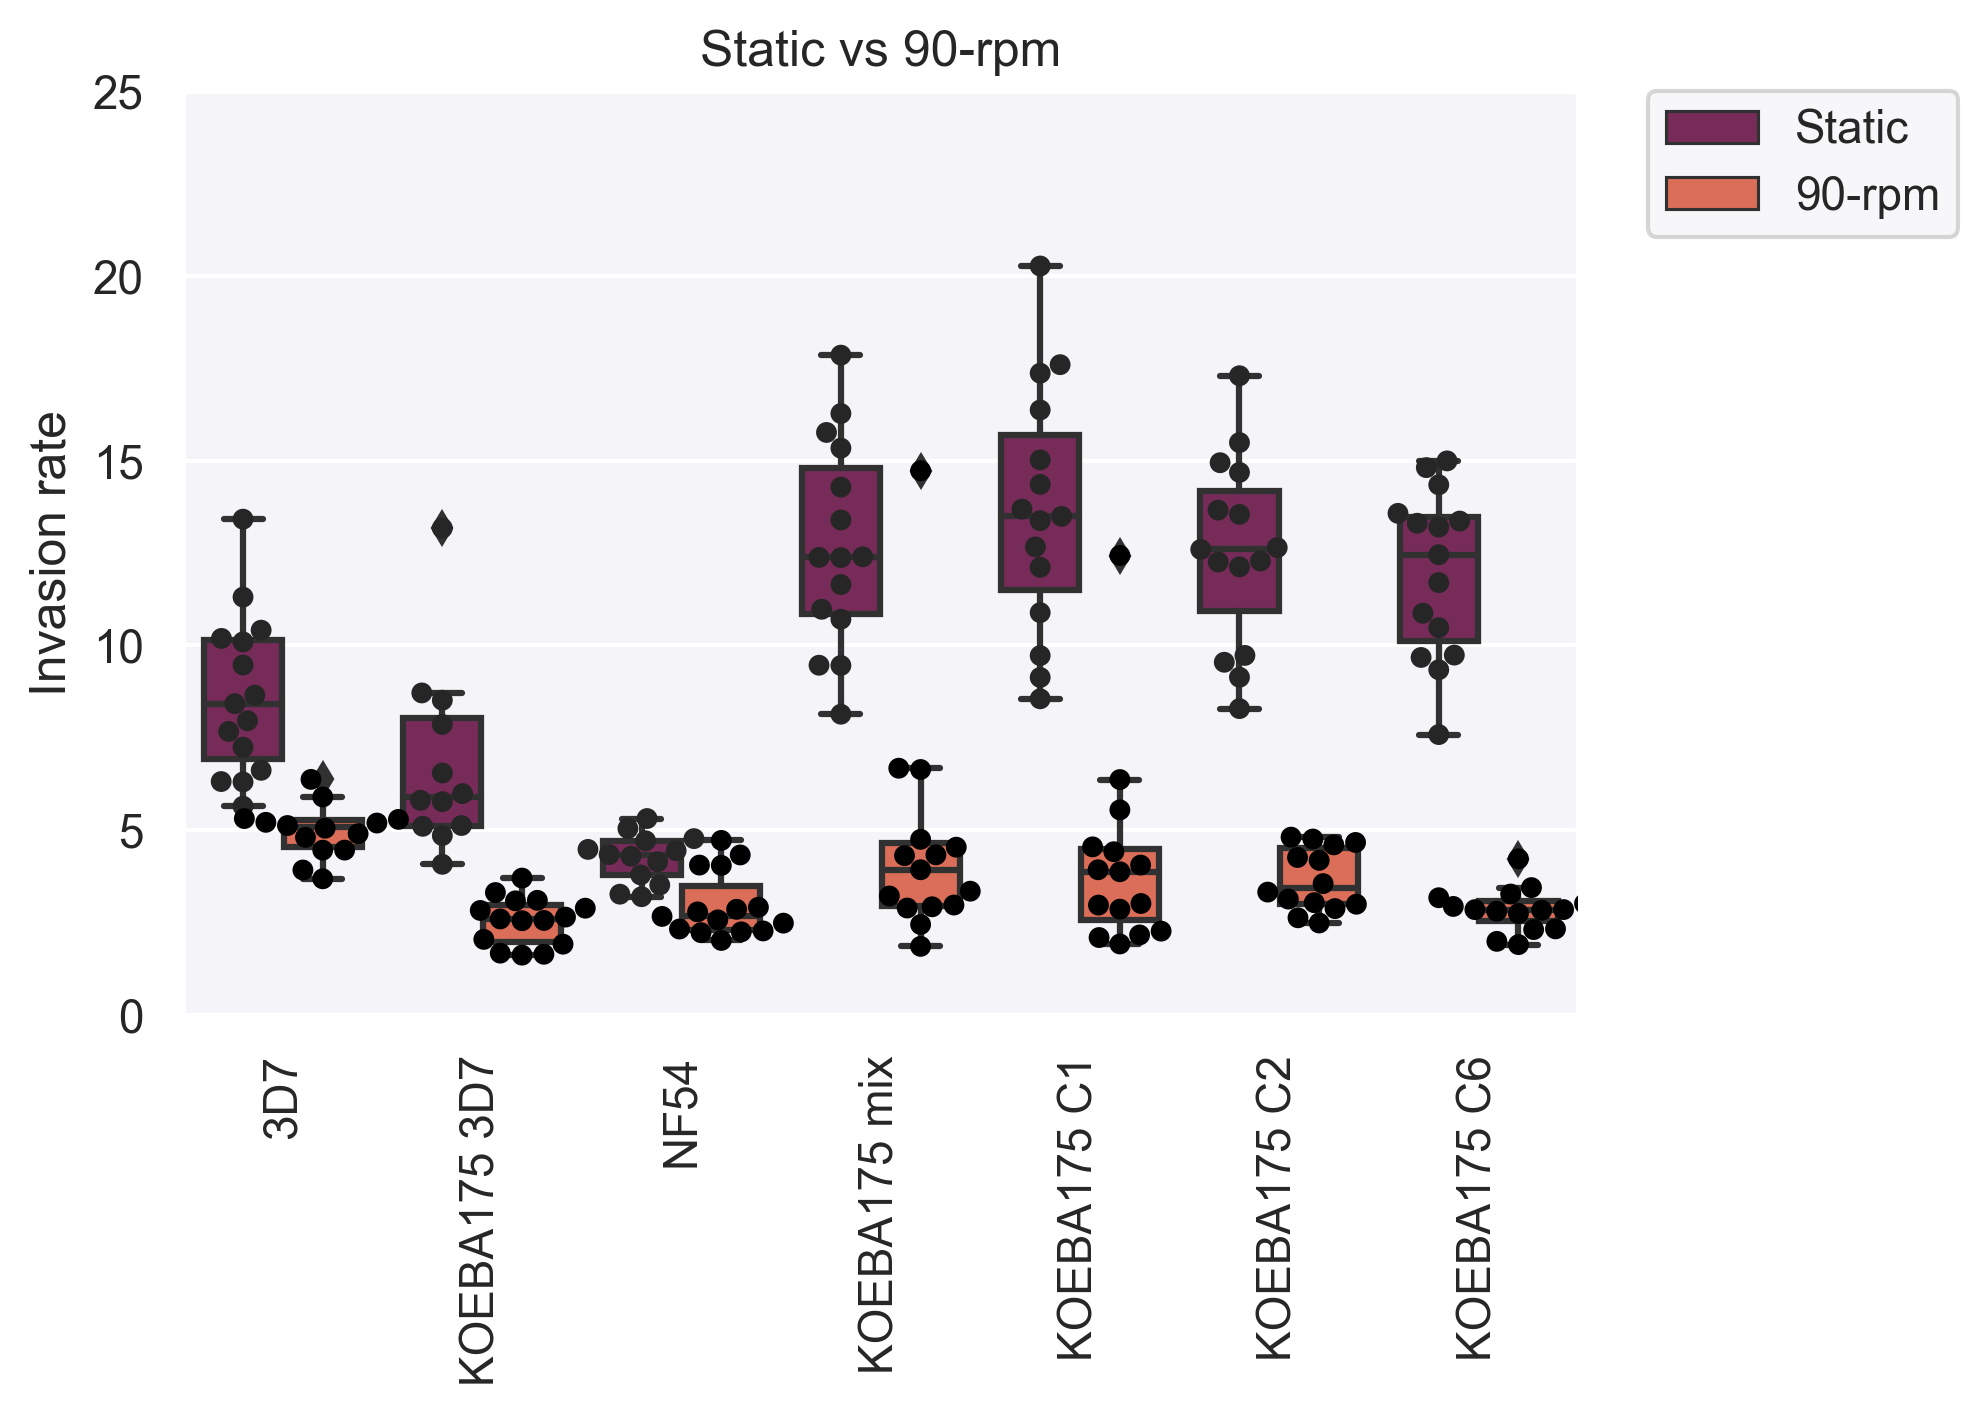

In [8]:
import re

# Different lines at 4%HCT and 6-well static vs 90rpm
pattern = f'({"|".join(hematocrit_levels)})$'
df_hem['Line_clone'] = df_hem['Line'].apply(lambda x: re.sub(pattern, '', x).strip())

print(df_hem['Line_clone'].unique())

speed_order_filter = ['Static', '90-rpm']
line_order_filter = ['3D7', 'KOEBA175 3D7', 'NF54', 'KOEBA175 mix', 'KOEBA175 C1', 'KOEBA175 C2', 'KOEBA175 C6']

dfq = df_hem
dfq = dfq.query('Hematocrit == "4%"')
dfq = dfq.query('Speed == @speed_order_filter')
dfq = dfq.query('Line_clone == @line_order_filter')

plt.figure(figsize=(6,4), dpi=300)

sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=1) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

sns.boxplot(x='Line_clone', order=line_order_filter, y='Invasion rate', data=dfq, hue='Speed', hue_order=speed_order_filter, palette='rocket')
sns.swarmplot(x='Line_clone', order=line_order_filter, y='Invasion rate', data=dfq, hue='Speed', hue_order=speed_order_filter, color='black', dodge=True, size=5, legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(f'Static vs 90-rpm')
plt.ylim((0,MAX_INVASION_RATE_PLOT))
plt.xticks(rotation=90)
plt.xlabel('')
plt.savefig(os.path.join(output_folder_ga2, f'Static vs 90-rpm.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
# plt.close()

# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df_hem)

def sem(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

for (speed, line), dfg in df_hem.groupby(['Speed','Line',]):
    data = dfg['Invasion rate']
    print(f'{speed}, {line}, {np.mean(data):.2f}, {sem(data):.2f}')


['NF54' '3D7' 'NF54 C2' 'KOEBA175 mix' 'KOEBA175 C1' 'KOEBA175 C2'
 'KOEBA175 C6' 'KOEBA175 3D7']
180-rpm, 3D7 2%, 8.93, 1.47,10
180-rpm, 3D7 4%, 17.16, 1.07,6
180-rpm, 3D7 8%, 7.12, 1.38,9
180-rpm, KOEBA175 C6, 10.17, 1.45,10
180-rpm, NF54 2%, 5.02, 0.33,10
180-rpm, NF54 4%, 11.71, 1.31,6
180-rpm, NF54 8%, 7.04, 0.99,9
45-rpm, 3D7 2%, 6.44, 0.33,10
45-rpm, 3D7 4%, 8.13, 0.59,14
45-rpm, 3D7 8%, 4.23, 0.66,8
45-rpm, KOEBA175 C6, 13.11, 0.91,15
45-rpm, NF54 2%, 3.12, 0.41,9
45-rpm, NF54 4%, 4.53, 0.40,14
45-rpm, NF54 8%, 3.39, 0.44,9
90-rpm, 3D7 2%, 1.84, 0.25,9
90-rpm, 3D7 4%, 4.98, 0.19,14
90-rpm, 3D7 8%, 8.53, 0.53,10
90-rpm, KOEBA175 3D7, 2.55, 0.17,15
90-rpm, KOEBA175 C1, 4.17, 0.68,15
90-rpm, KOEBA175 C2, 3.67, 0.23,14
90-rpm, KOEBA175 C6, 2.85, 0.15,15
90-rpm, KOEBA175 mix, 4.64, 0.80,15
90-rpm, NF54 2%, 2.37, 0.40,9
90-rpm, NF54 4%, 2.97, 0.23,15
90-rpm, NF54 8%, 2.15, 0.45,10
90-rpm, NF54 C2, 3.82, 0.22,15
Static, 3D7 2%, 8.33, 0.56,10
Static, 3D7 4%, 8.65, 0.56,15
Static, 3D7 8

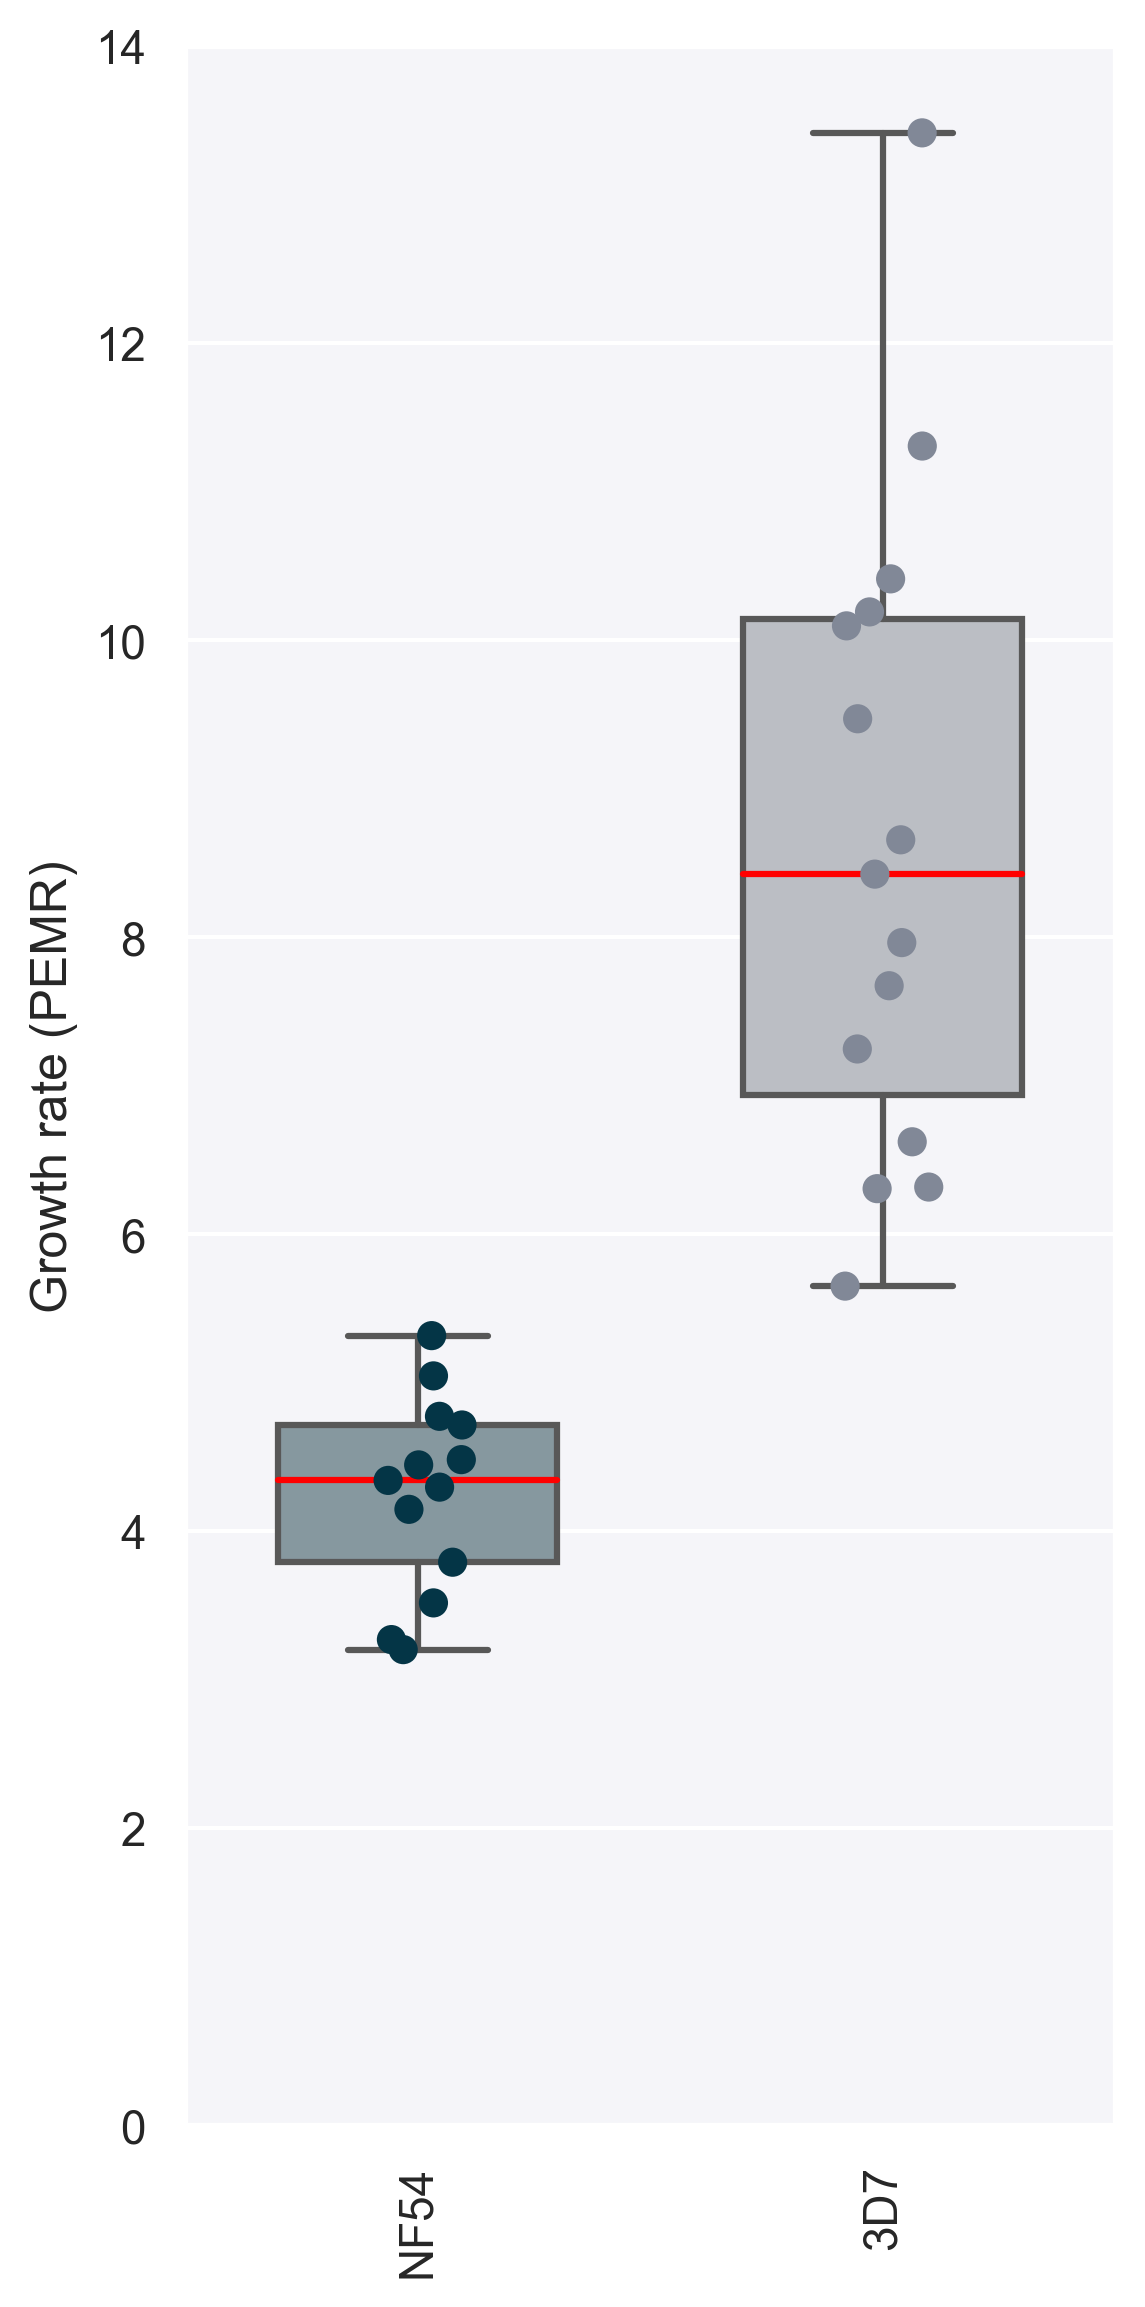

In [9]:
import re

colors_light = {
    'NF54': '#829AA3',
    'Heparin 50':'#829AA3',
    
    '3D7':'#B9BDC5',
    '3D7 (viola)': '#B9BDC5',

    'KOP230P': '#91b1be',
    'KOPfs25': '#9fc9d9',

    'KOEBA140': '#DAEBC6',
    'KOEBA181': '#84B06D',
    'KOEBA175': '#C1E2D4',
    'KOEBA175+Anti-GYPA':'#A5D0D4',
    'KORH1': '#F9DA9A',
    'KORH4': '#F3A59B',
    'KORh2a': '#F7CAA1',
    'KORH2a': '#F7CAA1',

    

    'Barseq': '#BEBFBC',

    'cKOMSP1 DMSO':'#B9BDC5',
    'cKOMSP1 Rap':'#FFE3B8',

    'Neuraminidase':'#D6EE96',
    
    'Anti-CD55':'#97B6DA',
    'Anti-GYPA':'#B6E2DF',
    'R1':'#F1AAD1',
    'Anti-GYPC':'#93E1DB',
    'Anti-CR1 ab25':'#DEAC7F',
    'Anti-CR1 ABIN':'#DEAC7F',

    'Anti-Basigin':'#C6C5D3',
   
    
  
    'cKOGAP45 DMSO': '#B9BDC5',
    'cKOGAP45 Rap': '#E5486C',

    'cKOAMA1 DMSO':'#B9BDC5',
    'cKOAMA1 Rap':'#EBD1D9',

    'NF54 x': '#829AA3',
    'NF54 y': '#829AA3',
    'NF54 mean': '#829AA3',
    'NF54 single': '#829AA3',

    'cKOMSP1 x': '#B9BDC5',
    'cKOMSP1 y': '#B9BDC5',
    'cKOMSP1 mean': '#B9BDC5',
    'cKOMSP1 single': '#B9BDC5',

    'cKOAMA1 x': '#B9BDC5',
    'cKOAMA1 y': '#B9BDC5',
    'cKOAMA1 mean': '#B9BDC5',
    'cKOAMA1 single': '#B9BDC5',

    'cKOGAP45 x': '#B9BDC5',
    'cKOGAP45 y': '#B9BDC5',
    'cKOGAP45 mean': '#B9BDC5',
    'cKOGAP45 single': '#B9BDC5',
    
 
}

colors_dark = {
    'NF54': '#043546',
    'Heparin 50':'#818897',

    '3D7':'#818897',
    '3D7 (viola)': '#818897',

    'KOP230P': '#406a7d',
    'KOPfs25': '#78a3b9',

    'KOEBA140': '#9ECA69',
    'KOEBA181': '#486737',
    'KOEBA175': '#6AB997',
    'KOEBA175+Anti-GYPA':'#04A0AF',
    'KORH1': '#F1AF23',
    'KORH4': '#E8513E',
    'KORh2a': '#ED8626',
    'KORH2a': '#ED8626',


    'Barseq': '#BEBFBC',

    'cKOMSP1 DMSO':'#FFD086',
    'cKOMSP1 Rap':'#FFD086',

    'Neuraminidase':'#ABDC29',
    
    'Anti-CD55':'#97B6DA',
    'Anti-GYPA':'#91D4CF',
    'R1':'#E459A5',
    'Anti-GYPC':'#35BEB4',
    'Anti-CR1 ab25':'#C6545E',
    'Anti-CR1 ABIN':'#C6545E',

    'Anti-Basigin':'#7E7C9C',
   
    
  
    'cKOGAP45 DMSO': '#81132C',
    'cKOGAP45 Rap': '#81132C',

    
    'cKOAMA1 DMSO':'#CC889D',
    'cKOAMA1 Rap':'#CC889D',

    'NF54 x': '#043546',
    'NF54 y': '#043546',
    'NF54 mean': '#043546',
    'NF54 single': '#043546',

    'cKOMSP1 x': '#FFD086',
    'cKOMSP1 y': '#FFD086',
    'cKOMSP1 mean': '#FFD086',
    'cKOMSP1 single': '#FFD086',

    'cKOAMA1 x': '#CC889D',
    'cKOAMA1 y': '#CC889D',
    'cKOAMA1 mean': '#CC889D',
    'cKOAMA1 single': '#CC889D',

    'cKOGAP45 x': '#81132C',
    'cKOGAP45 y': '#81132C',
    'cKOGAP45 mean': '#81132C',
    'cKOGAP45 single': '#81132C',
}

# OT paper Fig 1
pattern = f'({"|".join(hematocrit_levels)})$'
df_hem['Line_clone'] = df_hem['Line'].apply(lambda x: re.sub(pattern, '', x).strip())

print(df_hem['Line_clone'].unique())

speed_order_filter = ['Static']
line_order_filter = ['NF54','3D7']

dfq = df_hem
dfq = dfq.query('Hematocrit == "4%"')
dfq = dfq.query('Speed == @speed_order_filter')
dfq = dfq.query('Line_clone == @line_order_filter')

plt.figure(figsize=(4,9), dpi=300)

sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            font_scale=1) 
            #   color_codes=True, 
            #   rc=None)
sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

sns.boxplot(x='Line_clone', 
            order=line_order_filter, 
            y='Invasion rate', data=dfq, 
            hue='Strain',  
            palette=colors_light, 
            dodge=False,
            medianprops={"color": "red"},
            width=0.6,
            )


sns.stripplot(x='Line_clone', 
              order=line_order_filter, 
              y='Invasion rate', 
              data=dfq,
              hue='Strain',
              palette=colors_dark, 
              dodge=False, 
              size=7, 
              legend=False,
              jitter=True, 
              )

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title(f'Static vs 90-rpm')
plt.ylim((0,14))
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Growth rate (PEMR)')
plt.savefig(os.path.join(output_folder_ga2, f'NF54vs3D7_static.{GrowthAssayPlotlib.EXTENSION}'), bbox_inches='tight')
plt.legend().remove()
# plt.close()

# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df_hem)

def sem(data):
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

for (speed, line), dfg in df_hem.groupby(['Speed','Line',]):
    data = dfg['Invasion rate']
    print(f'{speed}, {line}, {np.mean(data):.2f}, {sem(data):.2f},{np.size(data)}')

# this allows the text to be editable in affinitity (it rescales the text)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(output_folder_ga2, f'tweezer attachment force_S1.svg'), bbox_inches='tight')

print({len(dfq.query('Strain == "3D7"'))})


In [10]:
# df2_melted_q = df_hem.query('Hematocrit != ["2%", "8%"]').copy()
# df2_melted_q['Line']  = df2_melted_q['Line simple']

# df3_melted_q = df3_melted.query('Plate == "6-well"').copy()

# df2_melted_q['Line'] = df2_melted_q['Line'] + ' GA2'
# df3_melted_q['Line'] = df3_melted_q['Line'] + ' GA3'

# df_merged = pd.concat([df2_melted_q, df3_melted_q], ignore_index=True)

# print(df_merged['Line'].unique())

# line_order_filter = [
#     'Dd2 GA3', 
#     '3D7 GA2', 
#     'NF54 GA2', 
#     'NF54 GA3',
#     'KOEBA175 C6 GA2', 
#     # 'KOEBA175 3D7 GA2', 
#     # 'KOEBA175 C1 GA2',
#     # 'KOEBA175 C2 GA2', 
#     # 'KOEBA175 mix GA2',
# ]

# dfq = df_merged.query('Line == @line_order_filter')

# plt.figure(figsize=(6,4), dpi=300)
# sns.boxplot(x='Speed', order=speed_order, y='Invasion rate', data=dfq, hue='Line', hue_order=line_order_filter, palette='rocket')
# sns.swarmplot(x='Speed', order=speed_order, y='Invasion rate', data=dfq, hue='Line', hue_order=line_order_filter, color='black', dodge=True, size=5, legend=False)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title(f'')
# plt.ylim((0,MAX_INVASION_RATE_PLOT))
# plt.savefig(os.path.join(output_folder_ga3, f'Comparison line.{EXTENSION}'), bbox_inches='tight')
# plt.close()